# <font color='purple'>03-HydroStaticEQ</font>

## 0. We start by importing the modules
* Numpy -- operations on arrays and matrixes (and pi)
* Matplotlib pyplot -- plotting library
* Astropy units -- defined quantities with units. We also import the CDS conversions

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
# This option enables plots to be inline, 
# as opposed to opening in a separate window.

from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable() 

## 1. Solving the equation of hydrostatic equilibium with known density.

### a. In class: the constant density case 

For a density that is constant inside of the star, we found that 
$$\frac{P(r)}{P_o} = \left[ 1 - \left(\frac{r}{R_\star}\right)^2\right],$$
where $P_o$ is the pressure at the center ($r=0$)

We will add this curve to the graph of $P(r)/P_c$ versus $r/R_\star$ below.


### b. At home: the decreasing density case

Now let's consider a density that varies as
$$\rho = \rho_o\left(1-\frac{r}{R_\star}\right),$$ 
as we did for the previous notebook L02. 

follow the same procedure to find $\frac{P(r)}{P_o}$, and add it to the plot below.

> **TODO** <font color='red'>: follow the same procedure to find $\frac{P(r)}{P_o}$ for the decreasing density case. Write your solution below. This means starting from the HS differential equation, but you can use results from notebook L02. Transform your integral to a unitless-form before performing the integration. Use Latex formatting to render the math (or enter a clear photo of your work -- see notebook L02)</font>

$$\frac{M_{r}}{M_{\star}} = 4\frac{r^3}{R_{\star}^3}-3\frac{r^4}{R_{\star}^4}, \: \frac{g}{g_\star} = 4\frac{r}{R_{\star}}-3\frac{r^2}{R_{\star}^2} $$

$$ P(r) = \int_{R_{\star}}^r  - \rho_{o} (1- \frac{r}{R_{\star}})g(r)dr = \int_{R_{\star}}^r  - \rho_{o} (1- \frac{r}{R_{\star}})g_{\star}(4\frac{r}{R_{\star}}-3\frac{r^2}{R_{\star}^2})dr = -\rho_{o}g_{\star} \int_{R_{\star}}^r (4\frac{r}{R_{\star}}-7\frac{r^2}{R_{\star}^2}+3\frac{r^3}{R_{\star}^3}) dr $$

$$ x = \frac{r}{R_\star} , \: dr = R_\star dx $$

$$ P(x) = -\rho_{o}g_{\star}R_\star \int_{1}^x (4x-7x^2+3x^3)dx $$

$$ P(x) = -\rho_{o}g_{\star}R_\star (2x^2 - \frac{7}{3}x^3 + \frac{3}{4}x^4)\Big|_{1}^x  $$

$$ P(x) = -\rho_{o}g_{\star}R_\star (2x^2 - \frac{7}{3}x^3 + \frac{3}{4}x^4 - \frac{5}{12}), \: P_o = \frac{5}{12} \rho_o g_\star R_\star  $$

$$ \frac{P(x)}{P_o} = -\frac{12}{5}(2x^2 - \frac{7}{3}x^3 + \frac{3}{4}x^4 - \frac{5}{12}) $$

> **TODO** <font color='red'>: Add this curve to the graph below, with a label in the legend.</font>

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


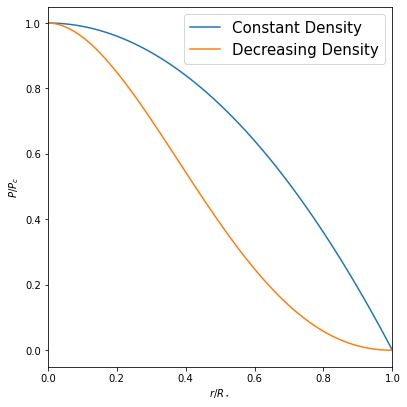

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
# The subplot routine creates a figure object (in the variable "fig"), which contains
# here a single plotting window called "axes" (in the variable "ax")
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.family': 'Times New Roman'})
# Set the font and font size for the whole figure.

ax.set_xlabel(r'$r/R_\star$') # the "r" is to say there is latex formatted strings.
ax.set_xlim(0,1)

ax.set_ylabel(r'$P/P_c$') 

#-------------------------------------------------------
# In class

# define an array of r / Rs, from 0 to 1, with 100 elements

r_rs = np.linspace(0, 1, 100)

# For constant density

P_Po = 1.0 - (r_rs)**2
ax.plot(r_rs, P_Po, label='Constant Density')


#-------------------------------------------------------
# For linearly decreasing density (portfolio)
# At home

P_Po2 = -12/5 * (2*r_rs**2 - 7/3 * r_rs**3 + 3/4 * r_rs**4 - 5/12)
ax.plot(r_rs,P_Po2,label='Decreasing Density')

#-------------------------------------------------------
ax.legend(loc=0, fontsize=15)
plt.tight_layout()
# arrange the plot nicely

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

For the constant density, the pressure shows a pretty consistent drop off towards a 0 pressure from the $\frac{r}{r_s}^2$ term. However, with the decreasing density case, the pressure decreases more rapidly in the beginning until it nears 0 and then tapers off to 0.

## 2. Now we would like to calculate the numerical value of the central pressure for a star of $1M_\odot$ and $1R_\odot$.

To give an idea, the values of density and pressure at the center of the Sun from sophisticated models are 165 g/cm$^3$ and $2.5\times10^{17} \mathrm{dyn / cm}^2$, respectively.

### a. In class: the constant density case

We know that
$$M_\star = \frac{4\pi R_\star^3}{3} \rho_o.$$
Therefore the density is
$$\rho_o = M_\star \frac{3}{4\pi R_\star^3}.$$

The central pressure is 
$$\frac{1}{2} \rho_o g_\star R_\star,$$

where the surface acceleration $g_\star = GM_\star / R_\star^2$.

In [ ]:
############
# In class
############

# Let's start with a demo on how to use the unit capabilities of astropy

rho = 1*u.M_sun * 3 / (4 * np.pi * u.R_sun**3)

# print(rho)
# print(rho.decompose())
# print(rho.to(u.g/u.cm**3))
print('In cgs units, the mean density of the sun is {}'.format(rho.cgs) )

gs = const.G * u.M_sun / u.R_sun**2

Po = 1/2 * rho * gs * u.Rsun

print('In cgs units, the central pressure of the sun is {:0.3g}'.format(Po2.to(u.dyn/u.cm**2)))

In cgs units, the mean density of the sun is 1.4097798243075257 g / cm3
In cgs units, the central pressure of the sun is 4.48e+15 dyn / cm2


> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

The result is off of the calculated density and pressure by orders of magnitude of 2 for each. This may be due to the use of a constant density.

### b. At home: the linearly decreasing density case

> **TODO**: <font color='red'>Now, you will derive expressions for the central density and central pressure (following the procedure above) for the case where we take the density to be $\rho = \rho_c\left(1-\frac{r}{R_\star}\right)$. Write your solution below in latex to render the math (or upload a clear photo of your work on paper). You can refer to results (scaled equations) from your previous notebooks.</font>

For the case of decreasing density:

$$ M_\star = \frac{1}{3}\pi\rho_{0}R_{\star}^3 $$

Then,

$$ \rho_o = M_\star \frac{3}{\pi R_\star^3} $$

And,

$$ P_o = \frac{5}{12} \rho_o g_\star R_\star $$

> **TODO**: <font color='red'>In the code cell below, use the astropy constant and unit packages to calculate the numerical values of the central density and central pressure for the decreasing density case. Make sure that the units are in the cgs pressure units, and that your 'print' statements include a label in front of the value.</font>

In [ ]:
#################
# At home
#################

rho2 = 1*u.M_sun * 3 / (np.pi * u.R_sun**3)

#print(rho2)
# print(rho.decompose())
# print(rho.to(u.g/u.cm**3))
print('In cgs units, the mean density of the sun is {}'.format(rho2.cgs) )

gs2 = const.G * u.M_sun / u.R_sun**2

Po2 = 5/12 * rho2 * gs2 * u.Rsun

print('In cgs units, the central pressure of the sun is {:0.3g}'.format(Po.to(u.dyn/u.cm**2)))

In cgs units, the mean density of the sun is 5.639119297230103 g / cm3
In cgs units, the central pressure of the sun is 1.34e+15 dyn / cm2


> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

Here, even with a decreasing density, the pressure is off by a magnitude of 2. It is greater than the constant density case and thusly more accurate. However, this is the pressure for the very center of the sun. To get a more accurate pressure we would need to integrate over the radius of the sun.

## 3. Reading assignement: "what can we measure about stars" -- part 2

In this graduate course, we are making an advanced physical and mathematical model of star. 

But it is still good to learn and/or remind ourselves about which physical characteristics of stars we can actually measure. You might have covered some of this in some details in previous physics or astro courses (at UD PHYS 133, 144, 333, or 469) -- but it is still a good idea to have a quick look at the suggested reading below before crafting your paragraph. 

One other thing that can be measured is the **distance** to a star.

> **TODO**: <font color='red'>Have a look at section 19.2 "Celestial Distances > Surveying the Stars" of the Open Stack Astronomy online [textbook](https://openstax.org/books/astronomy/pages/5-2-the-electromagnetic-spectrum), and write a short conceptual paragraph about how astronomer can determine the distance to (nearby) stars. </font>
You might also find is interesting to have a quick look at the GAIA space mission: https://sci.esa.int/web/gaia/-/28820-summary


You can find the distance to a star by first calculating the parallax of that star. By measuring the differences in angles between the observed location in the sky of two different places, you can find the parallax. From there, the distance is equal to the inverse of the parallax $ D = \frac{1}{p} $